In [1]:
import pandas as pd
df=pd.read_csv(r"C:\Users\Priyanshu\Desktop\twtrain.csv")

In [2]:
df.head(2)

,tweet_id,airline_sentiment,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,5.679000e+17,negative,Southwest,NaN,ColeyGirouard,NaN,0,"@SouthwestAir I am scheduled for the morning, ...",NaN,2/17/2015 20:16,Washington D.C.,Atlantic Time (Canada)
1,5.699890e+17,positive,Southwest,NaN,WalterFaddoul,NaN,0,@SouthwestAir seeing your workers time in and ...,NaN,2/23/2015 14:36,"Indianapolis, Indiana; USA",Central Time (US & Canada)


In [3]:
x=df.text

def f(s):
    if s =='negative' :
        return -1
    elif s=='positive' :
        return 1
    else:
        return 0
df['Y_train']=df.airline_sentiment.apply(f)
Y_train=df.Y_train

In [4]:
import nltk 
from nltk import pos_tag
from nltk.corpus import stopwords,wordnet
from nltk.stem import WordNetLemmatizer
import numpy as np
import string 
stopwords=set(stopwords.words('english'))
punctuations=string.punctuation
stopwords.update(punctuations)
lemmatizer = WordNetLemmatizer()
from nltk.tokenize import word_tokenize

In [5]:
def get_simple_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [6]:
def cleaning(tweet):
    each_tweet=[]
    words = word_tokenize(tweet)
    for j in words :
        if j.lower() not in stopwords and j.lower().isalpha():
            pos=pos_tag(j)
            each_tweet.append(lemmatizer.lemmatize(j,pos=get_simple_pos(pos[0][1])))
    return each_tweet

In [7]:
all_words=[]
for i in range (len(x)):
    tweet=x[i]
    cleaned_words=cleaning(tweet)
    all_words.append(cleaned_words)

In [8]:
each_tweet=[]
for sublist in all_words:
    each_tweet.append(" ".join(sublist))
len(each_tweet)

10980

In [9]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [10]:
tf=pd.read_csv(r"C:\Users\Priyanshu\Desktop\twtest.csv")
x_test=tf.textt

In [11]:
all_words_test=[]
for i in range (len(x_test)):
    tweet=x_test[i]
    cleaned_words=cleaning(tweet)
    all_words_test.append(cleaned_words)

In [12]:
each_tweet_test=[]
for sublist in all_words_test:
    each_tweet_test.append(" ".join(sublist))
len(each_tweet_test)

3660

In [13]:
# count_vec=TfidfVectorizer(max_features=3320,max_df=0.5,min_df=2)
count_vec=CountVectorizer(max_features=3310,ngram_range=(1,1))
xvectrain=count_vec.fit_transform(each_tweet)
X_train=xvectrain.todense()
xvectest=count_vec.transform(each_tweet_test)
X_test=xvectest.todense()

# Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,Y_train)

C:\Users\Priyanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Priyanshu\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [15]:
lr_score=lr.score(X_train,Y_train)
lr_score

0.8829690346083788

# Mutinomial Naive Bayes

In [16]:
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
mnb.fit(X_train,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [17]:
mnb_score=mnb.score(X_train,Y_train)
mnb_score

0.826775956284153

# Gaussian Naive Bayes


In [18]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [19]:
gnb_score=gnb.score(X_train,Y_train)
gnb_score

0.5401639344262295

In [27]:
Y_predinbuilt=gnb.predict(X_test)
Y_pred=[]
for i in Y_predinbuilt:
    if i == -1:
        Y_pred.append('negative')
    elif i == 1:
        Y_pred.append('positive')
    else:
        Y_pred.append('neutral')
np.savetxt("result.csv",Y_pred,fmt='%s')

In [28]:
negative_count,positive_count,neutral_count=0,0,0
for sentiment in Y_pred:
    if sentiment == 'positive':
        positive_count+=1
    elif sentiment == 'negative':
        negative_count+=1
    else:
        neutral_count+=1
positive_count,negative_count,neutral_count

(1846, 1006, 808)

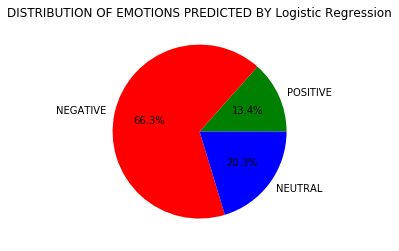

In [23]:
import matplotlib.pyplot as plt
Labels=['POSITIVE','NEGATIVE','NEUTRAL']
Sizes=[positive_count,negative_count,neutral_count]
colours=['green','red','blue']
plt.pie(Sizes,colors=colours,labels=Labels,autopct="%.1f%%")
plt.title('DISTRIBUTION OF EMOTIONS PREDICTED BY Logistic Regression')
plt.show()

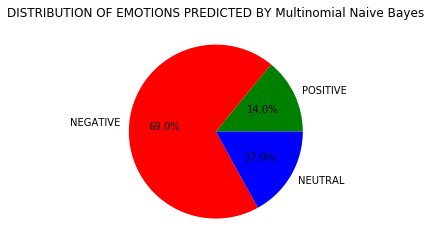

In [26]:
import matplotlib.pyplot as plt
Labels=['POSITIVE','NEGATIVE','NEUTRAL']
Sizes=[positive_count,negative_count,neutral_count]
colours=['green','red','blue']
plt.pie(Sizes,colors=colours,labels=Labels,autopct="%.1f%%")
plt.title('DISTRIBUTION OF EMOTIONS PREDICTED BY Multinomial Naive Bayes')
plt.show()

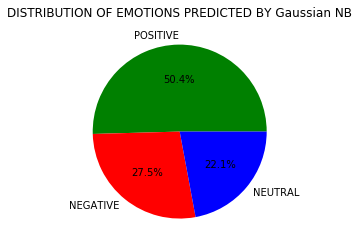

In [29]:
import matplotlib.pyplot as plt
Labels=['POSITIVE','NEGATIVE','NEUTRAL']
Sizes=[positive_count,negative_count,neutral_count]
colours=['green','red','blue']
plt.pie(Sizes,colors=colours,labels=Labels,autopct="%.1f%%")
plt.title('DISTRIBUTION OF EMOTIONS PREDICTED BY Gaussian NB')
plt.show()

# Accuracy Comparison


In [55]:
lr_accuracy,multinomial_nb_accuracy,gaussian_nb_accuracy=0.7831,0.7801,0.4139

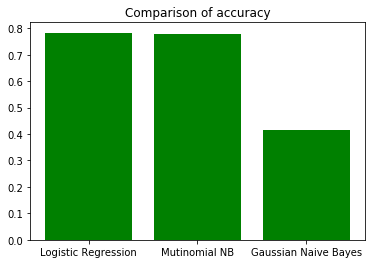

In [79]:
X_accuracy=['Logistic Regression','Mutinomial NB','Gaussian Naive Bayes']
Y_accuracy=[lr_accuracy,multinomial_nb_accuracy,gaussian_nb_accuracy]
plt.bar(X_accuracy,Y_accuracy,color='green')
plt.title('Comparison of accuracy')
plt.show()

# Algorithm trainining score

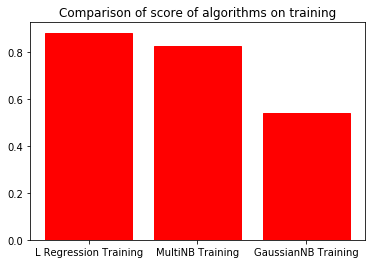

In [97]:
X_score=['L Regression Training','MultiNB Training','GaussianNB Training']
Y_score=[lr_score,mnb_score,gnb_score]
plt.bar(X_score,Y_score,COLOR='RED')
plt.title('Comparison of score of algorithms on training')
plt.show()